# CLUSTERIZAÇÃO (análise de agrupamentos) <p>
é uma técnica que faz parte do aprendizado não supervisionado

agrupar um numero k de diferentes grupos em um conjunto de dados (clusters) <p>
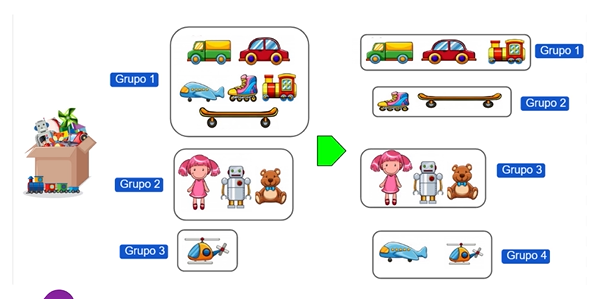

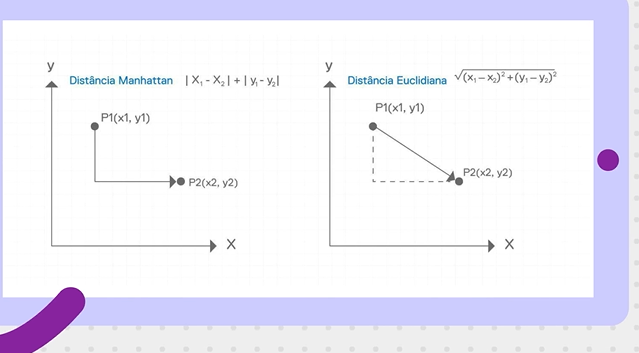

podem ser divididos em: <p>
**hierarquico**: arvores binarias ou dendograma <p>
**aglomerativos**: se unem ate que tenham um unico cluster <p>
**divisivos**: começam grandes e vao se dividindo <p>
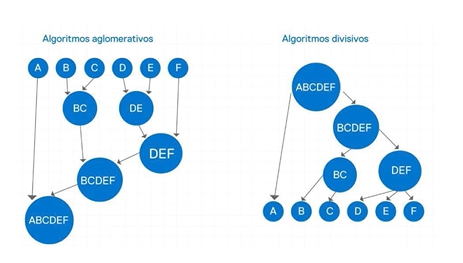

**náo hierarquicos**: dividem os dados em k clusters, de acordo com as distâncias 

# Clusterização com K-means

não hierarquico, agrupa em k custers diferentes <p>
**centroide de um cluste**r: valor central dos dados, obtidos pela média <p>
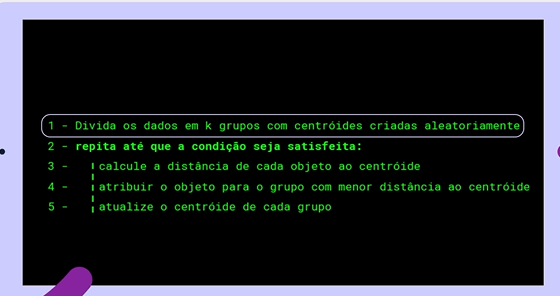

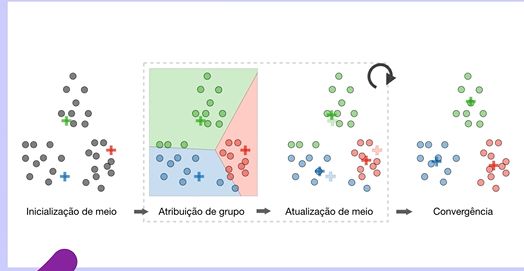

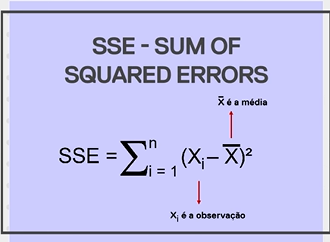

**ELBOW**: serve para encontrar o valor de k, plota a variancia dos dados em função do numero de clusters <p>
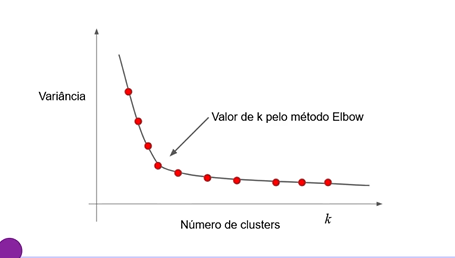

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Machine Learning - LEAD DELL/Aula 8 (3.1 e 3.2)/Mall_Customers.csv')
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


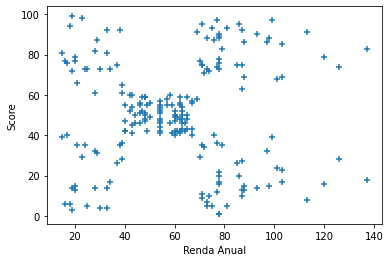

In [13]:
plt.scatter(dados['Annual Income (k$)'], dados['Spending Score (1-100)'], marker ='+')
plt.xlabel('Renda Anual')
plt.ylabel('Score')
plt.show()

In [14]:
X = dados[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=5, init='k-means++') # numero de clusters e inicialização
y_means = modelo.fit_predict(X)
print(y_means)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


**visualizando grupo**

In [22]:
print(X[y_means==0])

    Annual Income (k$)  Spending Score (1-100)
0                   15                      39
2                   16                       6
4                   17                      40
6                   18                       6
8                   19                       3
10                  19                      14
12                  20                      15
14                  20                      13
16                  21                      35
18                  23                      29
20                  24                      35
22                  25                       5
24                  28                      14
26                  28                      32
28                  29                      31
30                  30                       4
32                  33                       4
34                  33                      14
36                  34                      17
38                  37                      26
40           

**visualizando todos os grupos**

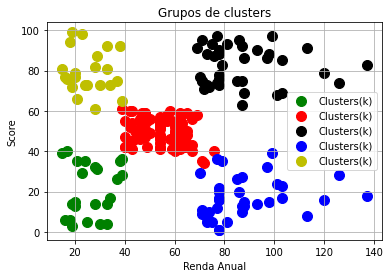

In [24]:
k_grupos = 5
cores = ['g', 'r', 'k', 'b', 'y']
for k in range(k_grupos):
  cluster = X[y_means==k]
  plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'], s = 100, c = cores[k], label = f'Clusters(k)')

# Linha 4: A variável "cluster" é definida como os valores em "X" (supostamente uma matriz ou dataframe) 
# onde os valores em "y_means" são iguais a "k".

# Linha 5: Utiliza-se a função "plt.scatter" para plotar um gráfico de dispersão dos valores 
# em "cluster['Annual Income (k$)']" (eixo x) e "cluster['Spending Score (1-100)']" (eixo y), com tamanho de pontos igual a 100, 
# cor definida pela "cores[k]" (onde "k" é a iteração atual do laço) e rótulo "Clusters(k)", onde "k" é a iteração atual do laço.

plt.title('Grupos de clusters')
plt.xlabel('Renda Anual')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()